In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from qutip import *
import scipy.optimize
from matplotlib import pyplot as plt

import cavity_qed_systems
import pulse
import cmps_utils
import tncontract as tn
import parameterized_pulse as ppulse

In [2]:
def optimize_overlap(state, target_mps, pulse):
    """Right now we assume that there is only one pulse."""
    def _obj_fun(x):
        pulse.update(x)
        olap = np.abs(state.get_inner_product(target_mps, [pulse]))**2
        print("Current overlap = ", olap)
        return -olap
    
    def _gradient(x):
        pulse.update(x)
        inner_prod = state.get_inner_product(target_mps, [pulse])
        grad_inner_prod = state.get_inner_prod_gradient(
            target_mps, [pulse])[0]
        grad = -2 * pulse.get_gradient(state.times) @ np.real(
            grad_inner_prod * np.conj(inner_prod))
        #print(np.shape(grad))
        return grad.astype(float)

    print(pulse.bounds())
    print(np.shape(pulse.state()))
    scipy.optimize.minimize(
        _obj_fun, pulse.state(), bounds=pulse.bounds(),jac=_gradient, method="L-BFGS-B") # jac=_gradient,

[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 ...
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
(501,)
Current overlap =  0.0009054274167233356


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0009056035357734493
Current overlap =  0.0009057796847491986
Current overlap =  0.0009064844546928241
Current overlap =  0.0009093063172545693
Current overlap =  0.0009171843591530721
Current overlap =  0.0009173603762576034
Current overlap =  0.0009175363471997514
Current overlap =  0.0009182404397780503
Current overlap =  0.0009210601505752002
Current overlap =  0.0009323924229598095
Current overlap =  0.000940933693257334
Current overlap =  0.0009411145260901566
Current overlap =  0.0009418381475353958
Current overlap =  0.0009447372771056562
Current overlap =  0.0009549122098019483
Current overlap =  0.0009550966839521095
Current overlap =  0.000955834926616567
Current overlap =  0.000958793437729447
Current overlap =  0.0009707163613622827
Current overlap =  0.0010198480855199141
Current overlap =  0.0010277404307737382
Current overlap =  0.0010279553666758345
Current overlap =  0.0010288157914285522
Current overlap =  0.0010322684004937033
Current overlap =  

Current overlap =  0.015609569244209554
Current overlap =  0.01565052389131052
Current overlap =  0.015814958919230643
Current overlap =  0.01648246143778466
Current overlap =  0.017670065989577648
Current overlap =  0.01771669483523649
Current overlap =  0.017903863885455364
Current overlap =  0.01826047765548034
Current overlap =  0.01830803072337554
Current overlap =  0.01849888650179475
Current overlap =  0.01858873360865092
Current overlap =  0.01863640797752391
Current overlap =  0.018827733814320177
Current overlap =  0.019602932116940815
Current overlap =  0.020905399859052043
Current overlap =  0.020958931859281348
Current overlap =  0.021173701545852092
Current overlap =  0.021415667250945385
Current overlap =  0.021470192938609998
Current overlap =  0.021524037382046907
Current overlap =  0.021740031741946834
Current overlap =  0.0224926469845578
Current overlap =  0.022548715515561576
Current overlap =  0.022773599824963166
Current overlap =  0.022794145765511586
Current ov

Current overlap =  0.07372712124677297
Current overlap =  0.0739736128118126
Current overlap =  0.0740400763598377
Current overlap =  0.07430595906162958
Current overlap =  0.07458197696229789
Current overlap =  0.07464839150544265
Current overlap =  0.07491406977227133
Current overlap =  0.07597697990701491
Current overlap =  0.07607573216968172
Current overlap =  0.07614222124871028
Current overlap =  0.0764081793101414
Current overlap =  0.07747191411573619
Current overlap =  0.07927779542856783
Current overlap =  0.10383801124115032
Current overlap =  0.1274585685259219
Current overlap =  0.13264658297170795
Current overlap =  0.1354053543244897
Current overlap =  0.1385321790865753
Current overlap =  0.14005939481762128
Current overlap =  0.14178455583943428
Current overlap =  0.14422551540391249
Current overlap =  0.1458507864660294
Current overlap =  0.14624965084643832
Current overlap =  0.1468719275937837
Current overlap =  0.14731074205407407
Current overlap =  0.147771595754

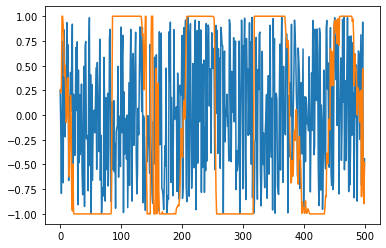

In [67]:
targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], 0.25, 0.5)
targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [-1,1], 0.25, 0.5)
delta2 = ppulse.DirectParameterizedPulse(20, 500, [-1, 1])
plt.plot(delta2.state())
optimize_overlap(state2, targetMPS2, delta2)
plt.plot(delta2.state())

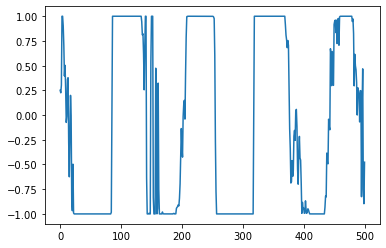

In [68]:
plt.plot(delta2.state())

In [36]:
targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.001, 20000, [0,0], 0.25, 0.5)
targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
state2 = cavity_qed_systems.ModulatedTavisCumming(0.001, 20000, [-1,1], 0.25, 0.5)
print(np.abs(state2.get_inner_product(targetMPS2, [pulse.ConstantPulse(0)]))**2)
print(np.abs(state2.get_inner_product(targetMPS2, [delta2]))**2)
print(np.abs(targetState2.get_inner_product(targetMPS2, [pulse.ConstantPulse(0)]))**2)

0.0010061776823898389
0.160881954576215
0.9532479992754749


In [61]:
pulseTune = delta2 
#pulseTune = pulse.ConstantPulse(0)

def tuningPulse(t, args):
    return pulseTune(t)

N = 3    #number cavity levels

detuning0 = -1
detuning1 = 1
g = 0.25
gamma_c = 0.5

sm0 = tensor(destroy(2), qeye(2), qeye(N))     # atomic lowering operator 0
sm1 = tensor(qeye(2), destroy(2), qeye(N))     # atomic lowering operator 1
cavLower = tensor(qeye(2), qeye(2), destroy(N))

H0 = sm0.dag()*sm0*detuning0 + sm1.dag()*sm1*detuning1
H_tc = g * (sm0*cavLower.dag() + sm0.dag()*cavLower + sm1*cavLower.dag() + sm1.dag()*cavLower)

#H_stark = tensor(fock(2,1)*fock(2,1).dag(), fock(2,1)*fock(2,1).dag(), qeye(N))

H_stark = cavLower.dag()*cavLower

H = [H0 + H_tc, [H_stark, tuningPulse]]

# collapse operator that describes dissipation
c_ops = [np.sqrt(gamma_c) * cavLower]  # represents cavity emission

#H_stark = tensor(fock(2,1)*fock(2,1).dag(), fock(2,1)*fock(2,1).dag(), qeye(N))

rho0 = tensor(fock(2,1), fock(2,1), fock(N,0))

zeroState = tensor(fock(2,0), fock(2,0), fock(N,0))

In [70]:
tlist = np.linspace(0,20,500)
taulist = np.linspace(0,20,500)

G2 = correlation_4op_2t(H, rho0, tlist, taulist, c_ops, cavLower.dag(), cavLower.dag(), cavLower, cavLower, solver='me', args={})

/Users/alexwhite/anaconda3/lib/python3.8/site-packages/qutip/correlation.py:913: FutureWarning: correlation_4op_2t() now legacy, please use correlation_3op_2t()
  warn("correlation_4op_2t() now legacy, please use correlation_3op_2t()",


In [69]:
def G2_shift(G2):
    #t is first index, tau is second index
    shape = np.shape(G2)
    G2_shifted = np.zeros(shape, dtype = 'complex')
    for t_ind in range(shape[0]):
        G2_shifted[t_ind, t_ind:] = G2[t_ind, 0:(shape[-1]-t_ind)]
    return G2_shifted

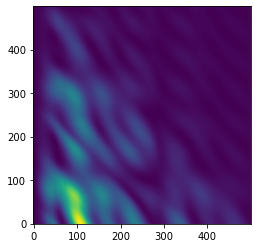

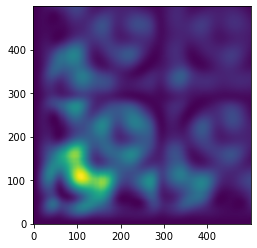

In [71]:
plt.imshow(np.abs(G2.T), origin = 'lower')
plt.show()
G2_shifted = G2_shift(G2) + np.tril(G2_shift(G2).T,-1)
plt.imshow(np.abs(G2_shifted.T), origin = 'lower')
plt.show()

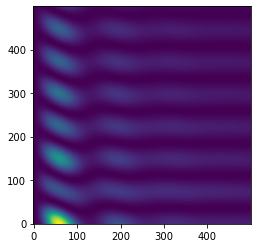

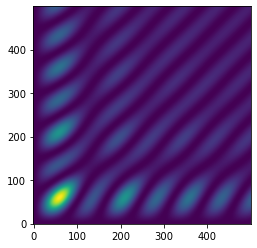

In [43]:
plt.imshow(np.abs(G2.T), origin = 'lower')
plt.show()
G2_shifted = G2_shift(G2) + np.tril(G2_shift(G2).T,-1)
plt.imshow(np.abs(G2_shifted.T), origin = 'lower')
plt.show()

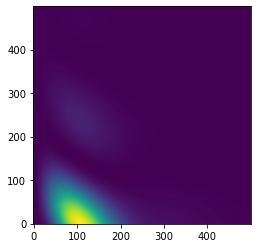

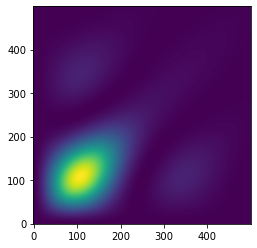

In [46]:
plt.imshow(np.abs(G2.T), origin = 'lower')
plt.show()
G2_shifted = G2_shift(G2) + np.tril(G2_shift(G2).T,-1)
plt.imshow(np.abs(G2_shifted.T), origin = 'lower')
plt.show()

In [72]:
T = 150
tlist = np.linspace(0,20,T)

scattered_state = temporal_scattered_state(H, rho0, 2, c_ops, tlist, zeroState)

correlations = np.zeros((T, T), dtype = 'complex')

for i in range(T):
    for j in range(T):
        # temporal_scattered_state() computes only using ordered emission times, so to  
        # get the full set of correlations, we need to use ordered temporal basis vector
        [a,b] = sorted([i,j])
        basis_vec = temporal_basis_vector([[a,b]], T)
        correlations[i,j] = ((basis_vec.dag() * scattered_state).full().item())

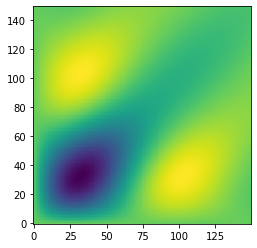

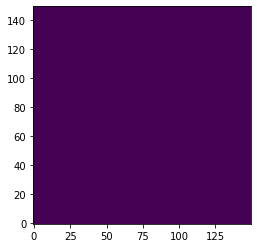

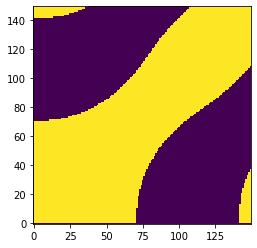

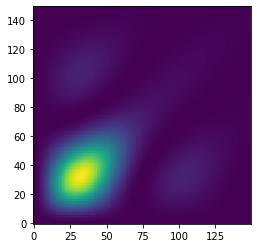

In [48]:
plt.imshow(np.real(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.imag(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.angle(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.abs(correlations)**2, interpolation='nearest', origin='lower')
plt.show()

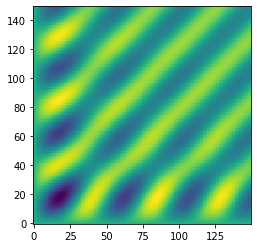

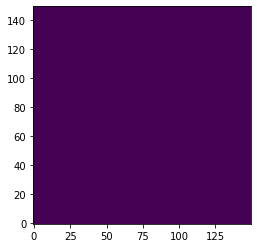

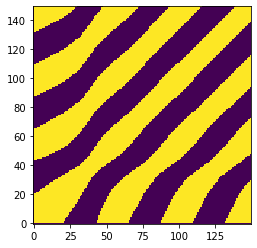

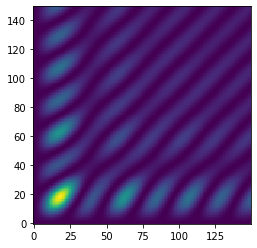

In [51]:
plt.imshow(np.real(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.imag(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.angle(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.abs(correlations)**2, interpolation='nearest', origin='lower')
plt.show()

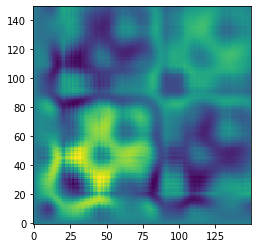

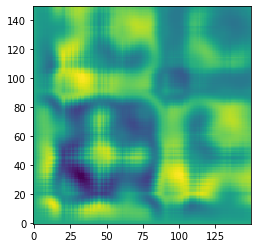

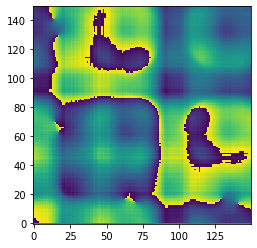

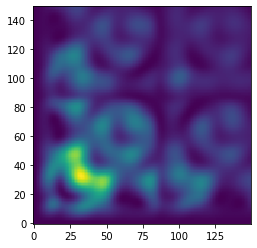

In [73]:
plt.imshow(np.real(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.imag(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.angle(correlations), interpolation='nearest', origin='lower')
plt.show()
plt.imshow(np.abs(correlations)**2, interpolation='nearest', origin='lower')
plt.show()